In [1]:
from fastai.vision.all import *
from pathlib import Path

In [2]:
path = Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/data')

In [3]:
((path/'train_images').ls())[1]

Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/data/train_images/new_cola (10).jpg.jpg')

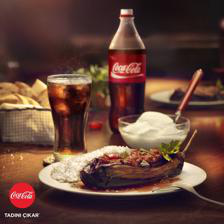

In [4]:
Image.open(((path/'train_images').ls())[10])

In [5]:
text = "new_cola (10).jpg"
re.findall(r'_(\w+)\s*\(', text)


['cola']

In [6]:

brands = ['cola', 'pepsi']
def get_brand_from_filename (image_name):
    image_name = image_name.name.lower()
    for brand in brands:
        if brand in image_name:
            return brand
        else:
            return 'unknown'

In [7]:
all_file = get_image_files(path/'train_images')
get_brand_from_filename(all_file[0])

'cola'

In [8]:
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    
    # فقط از پوشه train برای ساختن دیتاست استفاده می‌کنیم
    get_items=get_image_files, 
    
    # پوشه train را به صورت تصادفی به دو بخش آموزش و اعتبارسنجی تقسیم می‌کنیم
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    
    # برچسب را از نام فایل می‌گیریم
    get_y=using_attr(RegexLabeller(r'_(\w+)\s*\('), 'name'), 
    
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

data_block.summary(path/'train_images')

Setting-up type transforms pipelines
Found 470 items
2 datasets of sizes 376,94
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\data\train_images\new_cola (99).jpg.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=224x224
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\data\train_images\new_cola (99).jpg.jpg
    applying partial gives
      cola
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=224x224, TensorCategory(0))


Found 470 items
2 datasets of sizes 376,94
Setting up Pipeline: PILBase.create
Setting up Pipeline: part

In [32]:
dls = data_block.dataloaders(path/'train_images')

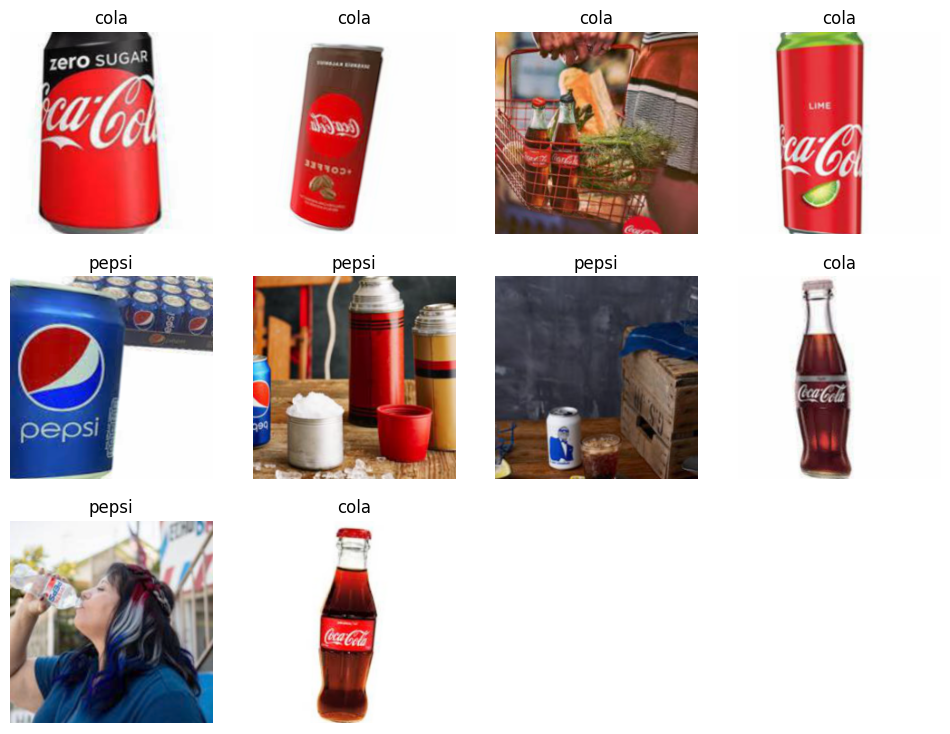

In [33]:
dls.show_batch(max_n = 10, nrows = 3)

Here, we used unique=True to have the same image repeated with different versions
of this RandomResizedCrop transform.

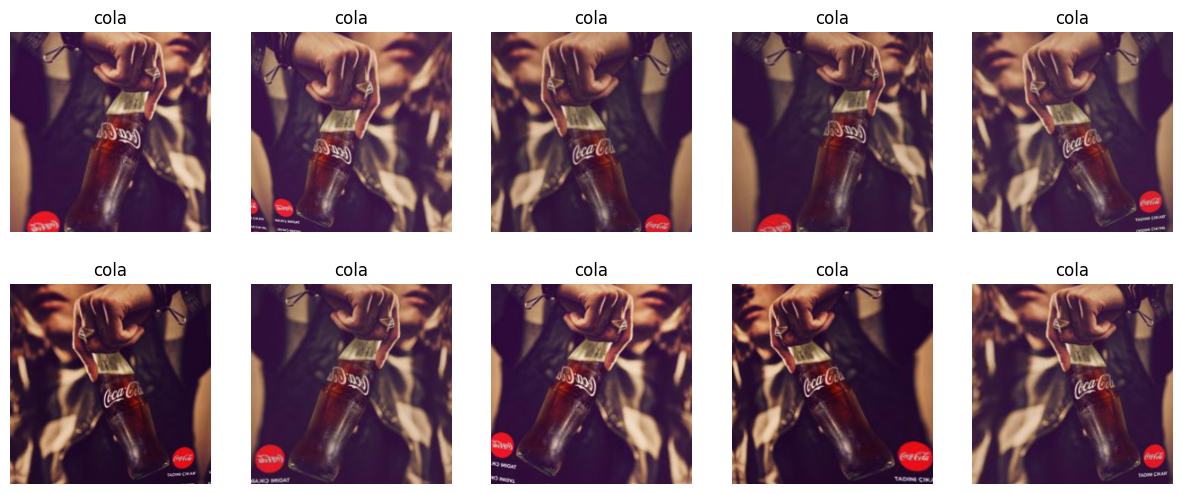

In [34]:
dls.train.show_batch(max_n = 10, nrows = 2, unique = True)

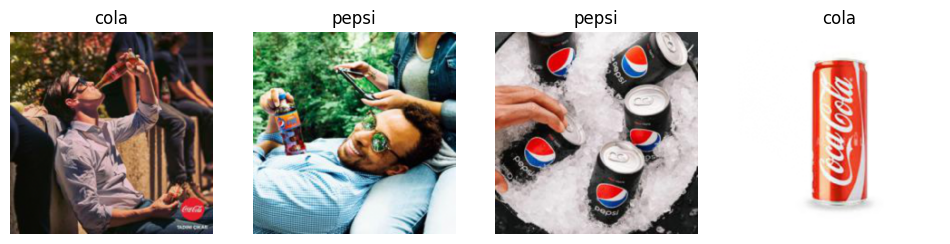

In [35]:
dls.valid.show_batch(max_n=4, nrows=1)

In [36]:
learner = vision_learner(dls , resnet34, metrics = error_rate)

In [37]:
x,y = dls.one_batch()

In [38]:
y

TensorCategory([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
                0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
                1])

In [39]:
preds = learner.get_preds(dl = [(x,y)])
preds[0]

tensor([[9.9806e-01, 1.9425e-03],
        [9.9980e-01, 1.9695e-04],
        [9.2459e-01, 7.5406e-02],
        [4.3765e-01, 5.6235e-01],
        [8.9829e-01, 1.0171e-01],
        [2.4476e-01, 7.5524e-01],
        [9.2565e-01, 7.4347e-02],
        [1.1398e-01, 8.8602e-01],
        [5.1406e-01, 4.8594e-01],
        [6.9313e-01, 3.0687e-01],
        [6.1235e-01, 3.8765e-01],
        [8.2810e-01, 1.7190e-01],
        [9.4044e-01, 5.9555e-02],
        [1.3553e-01, 8.6447e-01],
        [9.0833e-01, 9.1672e-02],
        [9.8216e-01, 1.7835e-02],
        [9.9717e-01, 2.8320e-03],
        [2.4158e-02, 9.7584e-01],
        [8.9253e-01, 1.0747e-01],
        [9.9994e-01, 6.2759e-05],
        [9.0550e-01, 9.4496e-02],
        [9.1415e-01, 8.5853e-02],
        [4.4877e-01, 5.5123e-01],
        [2.9585e-02, 9.7042e-01],
        [7.1900e-01, 2.8100e-01],
        [9.7579e-01, 2.4214e-02],
        [9.9525e-01, 4.7476e-03],
        [5.5553e-01, 4.4447e-01],
        [5.7758e-02, 9.4224e-01],
        [9.992

Improving Our Model

fining best learning rate..


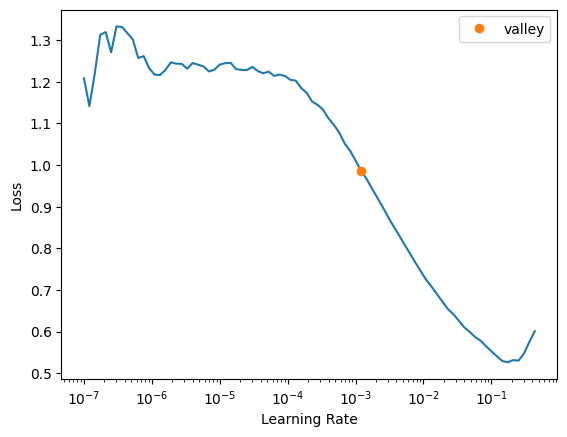

In [ ]:
print("fining best learning rate..")
suggested_lrs = learner.lr_find()

In [44]:
learner.fine_tune(4, base_lr= 4e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.158910,1.067891,0.127660,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.044053,0.367033,0.063830,01:22
1,0.082541,0.082647,0.021277,01:22
2,0.063764,0.062859,0.021277,01:24
3,0.065995,0.050848,0.021277,01:23


-- plot confusion matrix ----



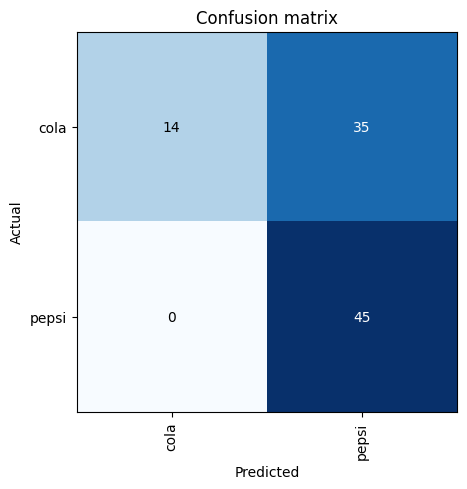

In [41]:
Intrep = ClassificationInterpretation.from_learner(learner)
print('-- plot confusion matrix ----\n')
Intrep.plot_confusion_matrix()

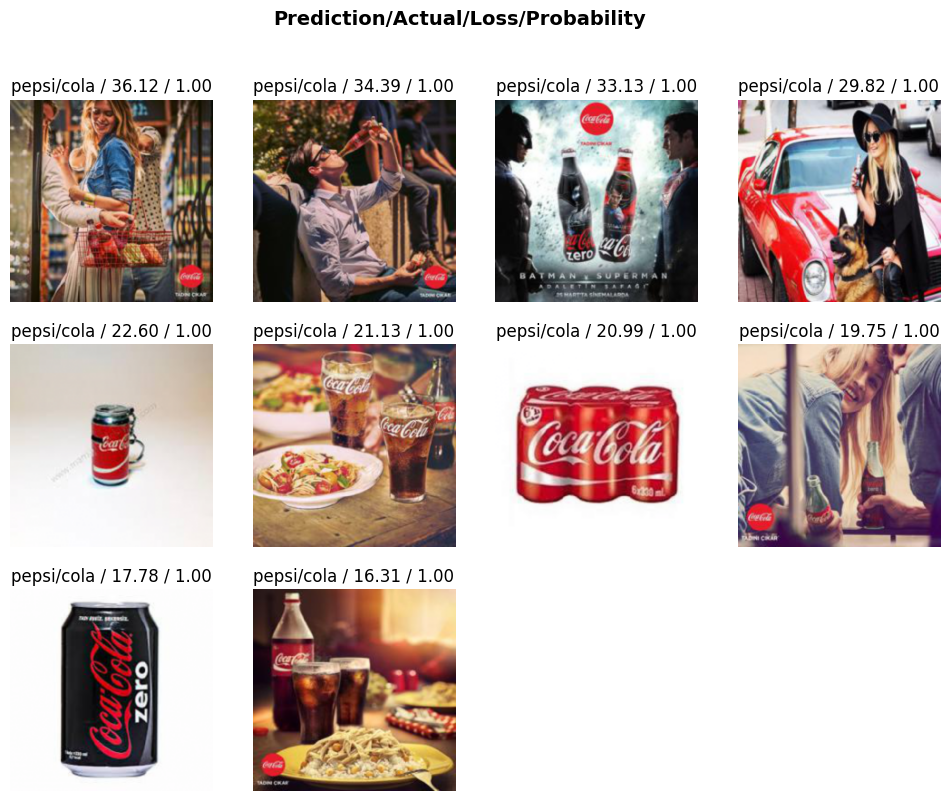

In [42]:
Intrep.plot_top_losses(10)

Clean our dataset

In [43]:
from fastai.vision.widgets import ImageClassifierCleaner

cleaner = ImageClassifierCleaner(learner)
cleaner

In [23]:
for idx,cat in cleaner.change() : shutil.move(str(cleaner.fns[idx]), path/cat)

In [24]:
for idx in cleaner.delete() :cleaner.fns[idx].unlink()

In [25]:
dls_clean = data_block.dataloaders((path/'train_images'))

In [26]:
learner_clean = vision_learner(dls_clean , resnet34, metrics = error_rate)

fining best learning rate..


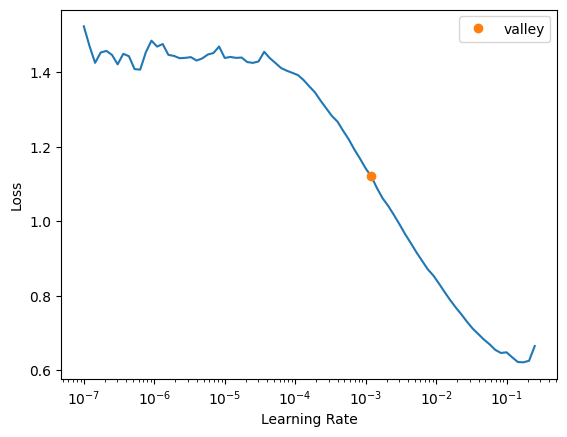

In [27]:
print("fining best learning rate..")
suggested_lrs_clean = learner_clean.lr_find()

In [28]:
learner_clean.fine_tune(4, base_lr= 4e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.671264,2.085061,0.202128,00:42


epoch,train_loss,valid_loss,error_rate,time
0,1.100939,3.182456,0.202128,01:15
1,0.601733,25.514191,0.574468,01:12
2,0.427723,11.690156,0.223404,01:20
3,0.328921,2.444973,0.117021,01:18


In [29]:
intrep_clean = ClassificationInterpretation.from_learner(learner_clean)

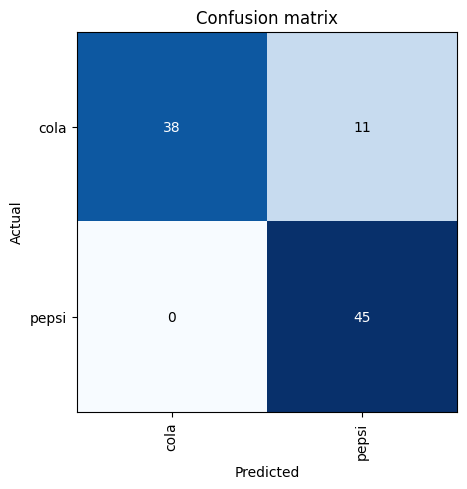

In [30]:
intrep_clean.plot_confusion_matrix()

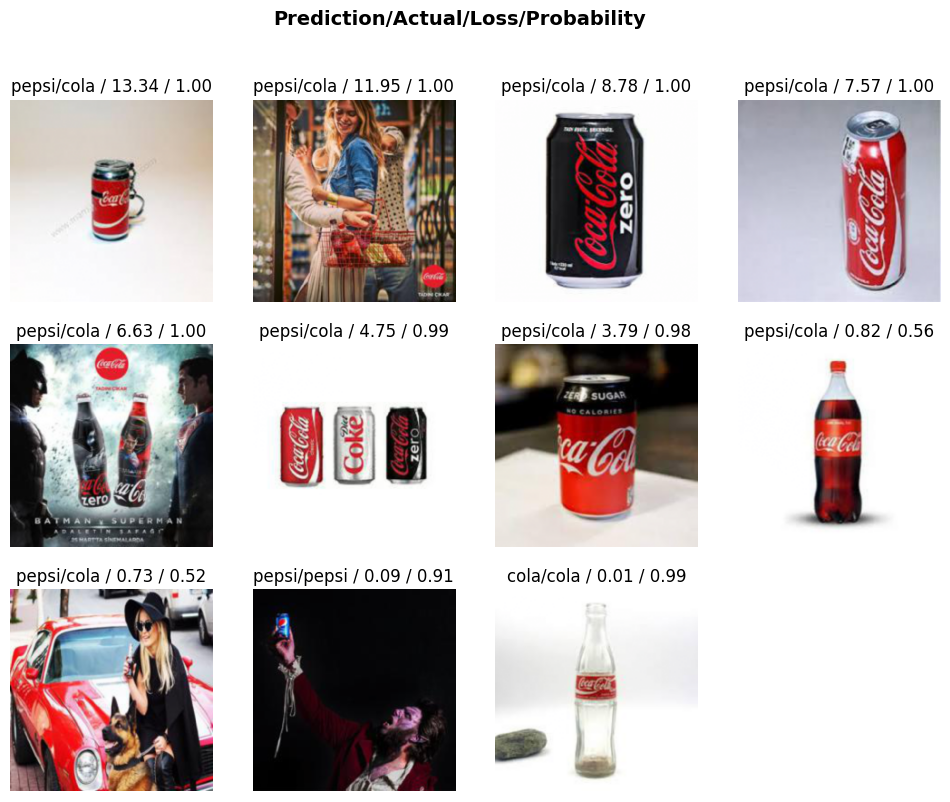

In [108]:
intrep_clean.plot_top_losses(11)